In [1]:
import pandas as pd

df = pd.read_json('quotes.json')
df['mod_Quote'] = df['Quote']
df.drop_duplicates(subset ="Quote", keep = 'first', inplace = True)

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemming = PorterStemmer()
stop_list = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kalya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import re
reg = re.compile(r'[a-zA-Z]')

def remove_noise(quote_word):
    words = word_tokenize(quote_word)
    currentQuote = []
    for word in words:
        if word not in stop_list and word.isalpha() and word not in [",", ".", "!", " ", ";"] and reg.match(word):
                currentQuote.append(stemming.stem(word.lower()))
    
    return " ".join(currentQuote)
    
df['mod_Quote'] = df['mod_Quote'].apply(remove_noise)

In [4]:
df['mod_Quote']

0                                      do cri smile happen
2        i selfish impati littl insecur i make mistak i...
5                             be everyon els alreadi taken
6        two thing infinit univers human stupid i sure ...
9                      be say feel mind matter matter mind
                               ...                        
48386    in buddhism say attach anyth lead suffer so la...
48387                      i love british humor it surreal
48388                         i got sens humor i funni guy
48389      humor wonder thing help realiz fool beauti time
48390                     life is full obstacl stumbl upon
Name: mod_Quote, Length: 36937, dtype: object

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['mod_Quote'])

tx = pd.DataFrame(data = X.toarray(), columns = vectorizer.get_feature_names())


In [30]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 200)
md = svd.fit_transform(X)
len(md)

36937

In [32]:
from sklearn.cluster import KMeans
import random

kmeans = KMeans(n_clusters = 2)
kmeans.fit(md)
labels = kmeans.predict(md)
xd = pd.DataFrame({'labels': labels, 'quotes': df['Quote']})
xd.sort_values(by='labels')
test = xd.groupby('labels').groups



In [33]:
full_quote_words=[]

for key in test:
    text = ''
    for wordItem in test[key]:
        text += '' + df['mod_Quote'][wordItem]
    full_quote_words.append(text)

In [25]:
len(full_quote_words)
full_quote_words[0]

'I\'m selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can\'t handle me at my worst, then you sure as hell don\'t deserve me at my best.No one can make you feel inferior without your consent.To be yourself in a world that is constantly trying to make you something else is the greatest accomplishment.Life is what happens to you while you\'re busy making other plans.It is not a lack of love, but a lack of friendship that makes unhappy marriages.That which does not kill us makes us stronger.Have you ever been in love? Horrible isn\'t it? It makes you so vulnerable. It opens your chest and it opens up your heart and it means that someone can get inside you and mess you up.Folks are usually about as happy as they make their minds up to be.If you can make a woman laugh, you can make her do anything.Who are you to judge the life I live?I know I\'m not perfect-and I don\'t live to be-but before you start pointing fingers...m

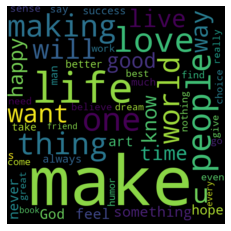

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=600, height=600, max_words=50).generate(full_quote_words[0])
 
# plot the WordCloud image
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

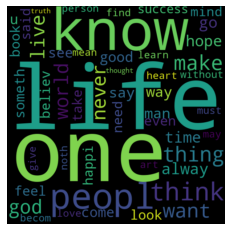

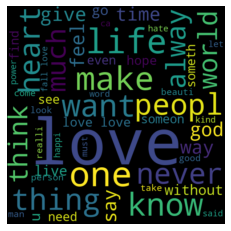

In [34]:
for item in full_quote_words:
    wordcloud =  WordCloud(width=600, height=600, max_words=50).generate(item)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()


In [22]:
import sys
!{sys.executable} -m pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt 

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters =k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-0')
plt.xlabel('number of clusters, K')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [25]:
df.head()

,Quote,Author,Tags,Popularity,Category,mod_Quote
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,life,do cri smile happen
2,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,love,i selfish impati littl insecur i make mistak i...
5,Be yourself; everyone else is already taken.,Oscar Wilde,"[attributed-no-source, be-yourself, honesty, i...",0.113223,inspiration,be everyon els alreadi taken
6,Two things are infinite: the universe and huma...,Albert Einstein,"[attributed-no-source, human-nature, humor, in...",0.103127,humor,two thing infinit univers human stupid i sure ...
9,"Be who you are and say what you feel, because ...",Bernard M. Baruch,"[ataraxy, be-yourself, confidence, fitting-in,...",0.101890,,be say feel mind matter matter mind


In [35]:
md[:,0]

array([0.05616424, 0.0924081 , 0.05042174, ..., 0.05806099, 0.13933412,
       0.06429554])

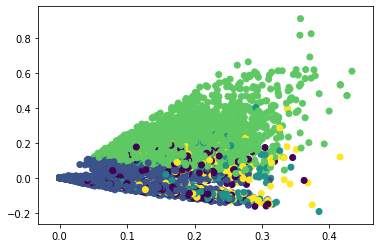

In [42]:
plt.scatter(md[:,0], md[:,1], c =labels )
plt.show()

In [63]:

try:
    df['Quote'][10071]
except KeyError:
    print("Index doesn't exist!")

Index doesn't exist!
